In [1]:
import time
import io
from contextlib import redirect_stdout

import numpy as np
import pandas as pd

from gatspy.periodic import LombScargleMultibandFast

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', UserWarning)

import os

%matplotlib inline

In [19]:
train_series = pd.read_csv('../input/training_set.csv')

In [20]:
meta_data = pd.read_csv('../input/training_set_metadata.csv')

In [21]:
gal_meta_series = meta_data[meta_data.hostgal_specz == 0].object_id

In [22]:
gal_cut = train_series.object_id.apply(lambda x : x in gal_meta_series.values)

In [29]:
gal_cut.shape

(1421705,)

In [23]:
gal_train_cut = train_series[gal_cut]

In [28]:
gal_train_cut.shape

(400574, 6)

In [25]:
exgal_train_cut = train_series[~gal_cut]

In [27]:
exgal_train_cut.shape

(1021131, 6)

In [46]:
flux_all_dict = {
    "flux": ["min", "max", "mean", "median", "std", "skew"],
    "flux_err": ["min", "std"],
    "detected": ["mean"]
}

In [40]:
flux_all_feats = train_series.groupby('object_id').agg(flux_all_dict)

In [47]:
flux_all_feats.columns

MultiIndex(levels=[['flux', 'flux_err', 'detected'], ['max', 'mean', 'median', 'min', 'skew', 'std']],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1, 2], [3, 0, 1, 2, 5, 4, 3, 5, 1]])

In [48]:
new_columns = [
        k + '_' + agg for k in flux_all_dict.keys() for agg in flux_all_dict[k]
    ]

In [49]:
new_columns

['flux_min',
 'flux_max',
 'flux_mean',
 'flux_median',
 'flux_std',
 'flux_skew',
 'flux_err_min',
 'flux_err_std',
 'detected_mean']

In [50]:
flux_all_feats.columns = new_columns

In [51]:
flux_all_feats

flux_min      flux_max    flux_mean  flux_median     flux_std  \
object_id                                                                     
615       -1100.440063    660.626343  -123.096998   -89.477524   394.109851   
713         -14.735178     14.770886    -1.423351    -0.873033     6.471144   
730         -19.159811     47.310059     2.267434     0.409172     8.022239   
745         -15.494463    220.795212     8.909206     1.035895    27.558208   
1124        -16.543753    143.600189     7.145702     1.141288    20.051722   
1227        -12.695161     71.678154     0.367212     0.208109     4.962633   
1598        -13.854152   1448.715698    30.333023     0.337299   167.317942   
1632        -14.525748     34.559826     1.760026     0.623454     5.273147   
1920        -13.367912    231.828339    19.228827     1.252908    48.004394   
1926        -52.764721     30.658575    -0.085210     0.166696     6.288463   
2072        -18.000116     21.651644     1.738064     0.912967     4.798681   
2103        -17.384005    214.805969    11.319435     0.262753    36.182796   
2300        -17.098705     35.218456     2.245681     0.700146     5.721734   
2330        -15.131953     23.507790     0.756080     0.493719     3.378378   
2624        -24.442568   1897.066772     7.837399     0.023840   104.323443   
2677       -216.426498     70.879387    -3.410157    -0.879244    23.087841   
2922        -16.889565    491.293518    11.240447     1.182631    46.867825   
3041        -14.235923     43.106094     1.598920     0.403060     5.512674   
3285        -13.541395    154.806046    10.312108     0.327200    29.258709   
3423        -10.048284     39.706257     2.094164     0.460224     6.068554   
3489        -15.918460     17.009882    -2.143732    -3.529613     6.120336   
3910        -19.942938    144.096008     2.632260     0.264442    16.162120   
4088       -135.767883    -15.595274   -68.667321   -68.480003    22.534184   
4132        -22.609297    111.286880     2.806525     0.551765    10.924613   
4171       -138.236618     19.964363     2.656349     5.382012    13.020162   
4173        -20.366323    244.895813    22.723006     1.877403    44.643590   
4220        -38.336807    775.901978    35.796108     0.253371   102.845916   
4389        -11.631914    112.362953    10.389586     1.518819    20.586851   
4595        -18.849697    121.370186     8.988213     0.139631    25.859771   
4819         -9.778987    307.736389    16.183766     1.375398    41.071071   
...                ...           ...          ...          ...          ...   
130219752  -160.337067    699.260620    18.006517     1.100459    91.724438   
130231675  -131.963898    106.466270     3.788283     1.466673    23.793783   
130263372   -81.350342    308.602722    11.648009     1.730133    47.922816   
130312781 -4100.565430    111.038277  -179.522329    -5.027404   683.797151   
130319749   -73.940628    179.314468    16.846116     4.493678    38.488443   
130330088   -83.172340    205.359573     4.548489     2.678701    27.306502   
130359176   -93.672585     67.438850     1.363173     1.830366    27.261943   
130375489   -45.988922     66.434090     6.527627     3.237972    17.042223   
130386135   -79.129097    710.673035     8.468272     0.067638    73.590744   
130402542   -43.089573    324.939941    16.250864     1.608565    54.131100   
130408188  -117.765930    169.314957    34.106033    32.950785    46.314026   
130414189   -78.610077   3404.353760   296.778553     4.039423   801.537555   
130489916  -755.781067     54.494091   -56.708234    -1.381414   155.517280   
130552230   -56.702835    274.474884    16.921819     2.769563    54.282815   
130595291   -44.091221    522.236511    35.242336     2.531238    88.967291   
130617044   -67.553955    402.425507    16.003875     3.796696    54.203638   
130622528  -105.786026    676.839233     6.187167    -1.172483    76.186329   
130639669   -91.631943    186.117493    20.548503     4.693686  

In [59]:
flux_kurt = train_series.groupby('object_id').flux.apply(lambda x: x.kurtosis())

In [61]:
flux_all_feats['flux_kurtosis'] = flux_kurt

In [53]:
flux_pb_feats = train_series.groupby(['object_id', 'passband']).agg({
    "flux": ["min", "max", "mean", "median", "std", "skew"],
})

In [81]:
flux_pb_kurt = train_series.groupby(['object_id', 'passband']).flux.apply(lambda x: x.kurtosis())

In [75]:
flat_flux_pb_feats = flux_pb_feats.unstack()

In [73]:
new_pb_cols = ["flux_"+str(i_pb)+"_"+measure for measure in flux_pb_feats.unstack().columns.levels[1] for i_pb in flux_pb_feats.unstack().columns.levels[2]]

In [76]:
flat_flux_pb_feats.columns = new_pb_cols

In [78]:
flat_flux_pb_feats

flux_0_min   flux_1_min   flux_2_min   flux_3_min  flux_4_min  \
object_id                                                                  
615       -116.913223 -1100.440063  -681.858887  -530.644592 -422.184509   
713        -14.735178   -11.715749   -10.067919   -12.394593  -12.286801   
730         -3.459960    -3.393080    -2.848838    -5.435799   -5.836310   
745         -3.874349    -3.618410    -2.159753    -4.944036  -15.494463   
1124        -6.804703    -2.622109    -2.084535    -2.800270  -16.543753   
1227        -3.818113    -2.582174    -2.793446    -3.693207   -8.176320   
1598        -7.049055    -3.504384    -3.254089    -3.270371   -5.226799   
1632        -3.751457    -5.074782    -2.935360    -5.678552   -5.789132   
1920        -3.560047    -8.547652    -3.757573    -4.013668   -9.072731   
1926        -7.061294    -3.843095    -2.316400    -6.478241   -9.012094   
2072        -4.855162    -2.576053    -2.988047    -5.997713   -5.333878   
2103        -4.709099    -7.297919    -3.893877    -3.287434   -4.846033   
2300        -4.737796    -3.401947    -2.000134    -3.178009  -11.276851   
2330        -8.054072    -1.941350    -2.259178    -2.458792   -7.190589   
2624        -6.794837   -12.490160    -5.809950    -7.007833  -10.981421   
2677        -8.199913  -137.934402  -216.426498  -186.129196 -126.412323   
2922        -5.714864   -10.424401    -2.899641    -4.468032   -7.087926   
3041        -4.278332    -4.355514    -2.045771    -3.324769   -5.956312   
3285        -4.159219    -3.970952    -3.566198    -3.875092   -6.844633   
3423       -10.048284    -4.165573    -3.673089    -1.791649   -6.734299   
3489        -9.282220   -10.712269   -10.045166    -9.752820  -12.163599   
3910        -4.857597    -8.318713    -2.855707    -4.109363   -6.270139   
4088       -97.975563   -91.431992   -80.155518   -92.166656  -94.781738   
4132        -4.083338    -7.043467    -2.261176    -3.842677   -5.849336   
4171        -7.739589   -62.735245   -77.706367   -40.608871  -33.234680   
4173        -3.190367    -3.714551    -2.104171    -3.504315   -5.555477   
4220        -6.347747    -3.556562    -3.550582    -4.071226  -10.592393   
4389        -2.773278    -1.778310    -4.675912    -4.826123   -4.865144   
4595        -8.825118    -3.876062    -3.369627    -4.598344   -5.479588   
4819        -5.875019    -4.241385    -3.785809    -5.274553   -7.588184   
...               ...          ...          ...          ...         ...   
130219752   -9.151092    -6.923565    -5.307000   -11.457074  -29.698137   
130231675  -10.919798    -3.053934    -5.846087   -14.116968  -19.722578   
130263372  -34.994026    -7.817695   -10.964223    -8.799705  -32.218479   
130312781 -698.741272 -4100.565430 -3742.978271 -2162.905029 -984.745972   
130319749  -15.497592    -4.783170    -2.063375   -10.880663  -50.142429   
130330088   -9.347571    -1.081875   -12.753837   -16.081211  -42.668751   
130359176  -50.946960   -15.854137    -5.781176   -17.014832  -41.058533   
130375489  -40.601444    -2.400613    -2.308689    -4.437305  -18.738150   
130386135  -19.579592    -2.302443    -7.588658   -28.885017  -34.848110   
130402542   -0.727187    -3.089329   -10.362833   -11.650477  -26.813545   
130408188  -26.629921   -11.995380  -117.765930  -103.771339  -39.496548   
130414189  -10.595397    -2.779037    -7.690232    -6.621925  -41.765408   
130489916  -30.627697  -460.566315  -690.581177  -755.781067 -542.326660   
130552230  -17.250694    -2.435744    -5.745941   -14.033565  -13.946017   
130595291  -17.358896    -6.199714    -4.375115    -8.377730  -14.508249   
130617044  -17.990786    -8.228725    -3.496323   -13.089312  -23.459734   
130622528   -9.656919    -5.196193   -10.257374   -35.955875  -53.697716   
130639669  -28.645819    -4.044621    -6.534637    -6.674594  -15.703308   
130659834   -8.251876    -2.440346   -12.036035   -25.767765  -24.493895   
130678775  -14.405594    -5.613419    -4.626390   -16.85232

In [101]:
flux_pb_kurt.unstack().columns[0]

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64', name='passband')

In [104]:
flux_pb_kurt.columns = ["flux_"+str(i_pb)+"_"+"kurtosis" for i_pb in flux_pb_kurt.unstack().columns]

In [106]:
flat_flux_pb_kurt = flux_pb_kurt.unstack()

In [108]:
flat_flux_pb_kurt.columns = ["flux_"+str(i_pb)+"_"+"kurtosis" for i_pb in flux_pb_kurt.unstack().columns]

In [109]:
flat_flux_pb_kurt

flux_0_kurtosis  flux_1_kurtosis  flux_2_kurtosis  flux_3_kurtosis  \
object_id                                                                       
615              -1.475181        -1.255123        -1.409885        -1.449858   
713              -1.014003        -1.097170        -1.188472        -1.142896   
730               0.474215         0.976374         5.131290         7.125665   
745               4.629801        50.868880        36.088137        16.392533   
1124              0.822496         6.112295        10.343254        14.095862   
1227             61.750257         8.032469        -0.365440        -0.497384   
1598             14.123886        27.224648        27.552463        26.695316   
1632             -0.118855         1.184768         0.745366         0.553651   
1920              4.943118        10.281546         7.119213         4.790152   
1926              1.003102         0.618042        18.634887        -0.388766   
2072              0.174851         1.737760         2.174862         2.828014   
2103             17.797724        10.652690         5.784546         5.547636   
2300              1.048049         1.157827        -0.152693        -0.160286   
2330              2.185658         0.067265         0.590549         3.715559   
2624             33.199204        33.004255        50.211052        47.686917   
2677              1.392816        20.772926        23.448374        21.405566   
2922              6.696623        34.147033        45.145556        49.448370   
3041             -0.757336         1.109448         9.099286         5.620143   
3285             10.145966        10.474323         5.282708         4.604376   
3423              3.895746         1.104300         4.458697        10.339319   
3489              0.695386        -0.162061        -0.703747        -0.420512   
3910             -0.483135        25.044041        28.014477        26.238983   
4088             -0.005760         0.013355         0.062882         0.022416   
4132              4.570918        13.404435        14.391990        11.433755   
4171              1.362759        15.601283        12.706583        11.426149   
4173              4.729250         3.388610         3.810145         3.989819   
4220             27.989684        10.010596         3.816481         2.964696   
4389              3.648403         0.955016         1.746570         3.565562   
4595              3.905723         9.219963         5.549622         4.499685   
4819              6.633185        36.822646        25.506798        11.784931   
...                    ...              ...              ...              ...   
130219752         1.323863         1.620185         8.996408         4.921953   
130231675        -0.417594        -0.324732         5.228464         8.530784   
130263372        -0.683142        -0.510675        23.345573        12.162281   
130312781         3.098882         9.997791         1.440261        17.556016   
130319749         0.259685         3.900948         1.203777         2.919284   
130330088        -1.262672        11.876953         0.545003         1.506510   
130359176        -0.247487        -0.120046         1.053874        -0.152517   
130375489         8.291201        -0.419766         1.446299         2.236213   
130386135         3.441890        -0.950583        20.945076         8.512567   
130402542         3.788064        -0.756002         1.753363        10.154895   
130408188         2.286504         1.653911         2.607344         2.498165   
130414189         3.138374         9.999231         3.573696         6.737371   
130489916        -0.308629         7.963965         1.346989         4.893403   
130552230         1.121856        -0.545860         5.934819         7.875585   
130595291         3.783254         6.335470         4.360166        -0.149552   
130617044        -0.844916         6.887578         9.308072         6.244472   
130622528         0.743496        10.99337

In [111]:
pd.concat([flux_all_feats, flat_flux_pb_feats, flat_flux_pb_kurt], axis=1)

flux_min      flux_max    flux_mean  flux_median     flux_std  \
object_id                                                                     
615       -1100.440063    660.626343  -123.096998   -89.477524   394.109851   
713         -14.735178     14.770886    -1.423351    -0.873033     6.471144   
730         -19.159811     47.310059     2.267434     0.409172     8.022239   
745         -15.494463    220.795212     8.909206     1.035895    27.558208   
1124        -16.543753    143.600189     7.145702     1.141288    20.051722   
1227        -12.695161     71.678154     0.367212     0.208109     4.962633   
1598        -13.854152   1448.715698    30.333023     0.337299   167.317942   
1632        -14.525748     34.559826     1.760026     0.623454     5.273147   
1920        -13.367912    231.828339    19.228827     1.252908    48.004394   
1926        -52.764721     30.658575    -0.085210     0.166696     6.288463   
2072        -18.000116     21.651644     1.738064     0.912967     4.798681   
2103        -17.384005    214.805969    11.319435     0.262753    36.182796   
2300        -17.098705     35.218456     2.245681     0.700146     5.721734   
2330        -15.131953     23.507790     0.756080     0.493719     3.378378   
2624        -24.442568   1897.066772     7.837399     0.023840   104.323443   
2677       -216.426498     70.879387    -3.410157    -0.879244    23.087841   
2922        -16.889565    491.293518    11.240447     1.182631    46.867825   
3041        -14.235923     43.106094     1.598920     0.403060     5.512674   
3285        -13.541395    154.806046    10.312108     0.327200    29.258709   
3423        -10.048284     39.706257     2.094164     0.460224     6.068554   
3489        -15.918460     17.009882    -2.143732    -3.529613     6.120336   
3910        -19.942938    144.096008     2.632260     0.264442    16.162120   
4088       -135.767883    -15.595274   -68.667321   -68.480003    22.534184   
4132        -22.609297    111.286880     2.806525     0.551765    10.924613   
4171       -138.236618     19.964363     2.656349     5.382012    13.020162   
4173        -20.366323    244.895813    22.723006     1.877403    44.643590   
4220        -38.336807    775.901978    35.796108     0.253371   102.845916   
4389        -11.631914    112.362953    10.389586     1.518819    20.586851   
4595        -18.849697    121.370186     8.988213     0.139631    25.859771   
4819         -9.778987    307.736389    16.183766     1.375398    41.071071   
...                ...           ...          ...          ...          ...   
130219752  -160.337067    699.260620    18.006517     1.100459    91.724438   
130231675  -131.963898    106.466270     3.788283     1.466673    23.793783   
130263372   -81.350342    308.602722    11.648009     1.730133    47.922816   
130312781 -4100.565430    111.038277  -179.522329    -5.027404   683.797151   
130319749   -73.940628    179.314468    16.846116     4.493678    38.488443   
130330088   -83.172340    205.359573     4.548489     2.678701    27.306502   
130359176   -93.672585     67.438850     1.363173     1.830366    27.261943   
130375489   -45.988922     66.434090     6.527627     3.237972    17.042223   
130386135   -79.129097    710.673035     8.468272     0.067638    73.590744   
130402542   -43.089573    324.939941    16.250864     1.608565    54.131100   
130408188  -117.765930    169.314957    34.106033    32.950785    46.314026   
130414189   -78.610077   3404.353760   296.778553     4.039423   801.537555   
130489916  -755.781067     54.494091   -56.708234    -1.381414   155.517280   
130552230   -56.702835    274.474884    16.921819     2.769563    54.282815   
130595291   -44.091221    522.236511    35.242336     2.531238    88.967291   
130617044   -67.553955    402.425507    16.003875     3.796696    54.203638   
130622528  -105.786026    676.839233     6.187167    -1.172483    76.186329   
130639669   -91.631943    186.117493    20.548503     4.693686  

In [112]:
flux_all_feats['flux_diff'] = flux_all_feats['flux_max'] - flux_all_feats['flux_min']

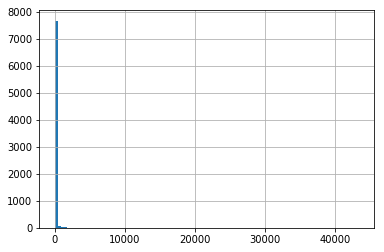

In [124]:
flux_all_feats['flux_median'].abs().hist(bins=100)

In [125]:
flux_all_feats['flux_abs_median'] = train_series.groupby('object_id').flux.apply(lambda x: x.abs().median())

In [127]:
flux_all_feats['flux_abs_median'].describe()

count     7848.000000
mean       100.661588
std        876.233972
min          1.002022
25%          4.801788
50%          7.263348
75%         11.680613
max      43365.859375
Name: flux_abs_median, dtype: float64

In [128]:
flux_all_feats['flux_diff_dbmed'] = flux_all_feats['flux_diff'] / flux_all_feats['flux_abs_median']

In [129]:
flux_all_feats['flux_diff_dbmed'].describe()

count     7848.000000
mean        83.874359
std        399.728511
min          0.535357
25%         21.113502
50%         35.075426
75%         68.455741
max      24590.682799
Name: flux_diff_dbmed, dtype: float64

In [130]:
flux_all_feats['flux_diff'].describe()

count    7.848000e+03
mean     1.806196e+03
std      4.160635e+04
min      2.126078e+01
25%      1.601710e+02
50%      2.554365e+02
75%      5.078297e+02
max      3.582197e+06
Name: flux_diff, dtype: float64

In [131]:
flux_all_feats['flux_max_dbmed'] = flux_all_feats['flux_max'] / flux_all_feats['flux_abs_median']

In [132]:
flux_all_feats['flux_min_dbmed'] = flux_all_feats['flux_min'] / flux_all_feats['flux_abs_median']

In [158]:
flux_pb_feats.columns = ['flux_'+measure for measure in flux_pb_feats.columns.levels[1]]

In [159]:
concat_pd_feats = pd.concat([flux_pb_feats, pd.DataFrame({'flux_kurt':flux_pb_kurt}), pd.DataFrame({'flux_absmed': flux_pb_absmed})], axis=1)

In [153]:
concat_pd_feats['flux_diff'] = concat_pd_feats

object_id  passband
615        0           -116.913223
           1          -1100.440063
           2           -681.858887
           3           -530.644592
           4           -422.184509
           5           -422.815094
713        0            -14.735178
           1            -11.715749
           2            -10.067919
           3            -12.394593
           4            -12.286801
           5            -14.211164
730        0             -3.459960
           1             -3.393080
           2             -2.848838
           3             -5.435799
           4             -5.836310
           5            -19.159811
745        0             -3.874349
           1             -3.618410
           2             -2.159753
           3             -4.944036
           4            -15.494463
           5            -10.249387
1124       0             -6.804703
           1             -2.622109
           2             -2.084535
           3             -2.800270


In [139]:
flux_pb_absmed = train_series.groupby(['object_id', 'passband']).flux.apply(lambda x: x.abs().median())

In [154]:
concat_pd_feats = pd.concat([flux_pb_feats, pd.DataFrame({'flux_kurt':flux_pb_kurt}), pd.DataFrame({'flux_absmed': flux_pb_absmed})], axis=1)

In [161]:
concat_pd_feats["flux_diff"] = concat_pd_feats["fluxmax"] - concat_pd_feats["fluxmin"]

In [162]:
concat_pd_feats["flux_diff_dbmed"] = concat_pd_feats["flux_diff"] / concat_pd_feats['flux_absmed']

In [163]:
concat_pd_feats["flux_max_dbmed"] = concat_pd_feats["fluxmax"] / concat_pd_feats['flux_absmed']

In [165]:
concat_pd_feats["flux_min_dbmed"] = concat_pd_feats["fluxmin"] / concat_pd_feats['flux_absmed']

In [167]:
concat_pd_feats.head()

fluxmin     fluxmax    fluxmean  fluxmedian  \
object_id passband                                                    
615       0         -116.913223  125.182808   -3.254554  -10.015225   
          1        -1100.440063  660.626343 -385.699911 -488.057969   
          2         -681.858887  611.984558 -134.146566 -265.686004   
          3         -530.644592  445.737061 -121.103501 -162.170944   
          4         -422.184509  381.953735  -55.954592 -103.541366   

                       fluxstd  fluxskew  flux_kurt  flux_absmed    flux_diff  \
object_id passband                                                              
615       0          83.944735  0.128917  -1.475181    86.776741   242.096031   
          1         601.787302  0.415580  -1.255123   648.753753  1761.066406   
          2         455.121346  0.339918  -1.409885   464.553833  1293.843445   
          3         335.425053  0.293128  -1.449858   346.977951   976.381653   
          4         291.803449  0.200096  -1.548319   304.690231   804.138244   

                    flux_diff_dbmed  flux_max_dbmed  flux_min_dbmed  
object_id passband                                                   
615       0                2.789872        1.442585       -1.347288  
          1                2.714538        1.018301       -1.696237  
          2                2.785131        1.317360       -1.467772  
          3                2.813959        1.284626       -1.529332  
          4                2.639199        1.253581       -1.385619

In [171]:
flat_concat_pd_feats = concat_pd_feats.unstack()

In [173]:
flat_concat_pd_feats.columns = [key + "_" + str(pb) for key in flat_concat_pd_feats.columns.levels[0] for pb in flat_concat_pd_feats.columns.levels[1]]

In [174]:
flat_concat_pd_feats.head()

fluxmin_0    fluxmin_1   fluxmin_2   fluxmin_3   fluxmin_4  \
object_id                                                                
615       -116.913223 -1100.440063 -681.858887 -530.644592 -422.184509   
713        -14.735178   -11.715749  -10.067919  -12.394593  -12.286801   
730         -3.459960    -3.393080   -2.848838   -5.435799   -5.836310   
745         -3.874349    -3.618410   -2.159753   -4.944036  -15.494463   
1124        -6.804703    -2.622109   -2.084535   -2.800270  -16.543753   

            fluxmin_5   fluxmax_0   fluxmax_1   fluxmax_2   fluxmax_3  \
object_id                                                               
615       -422.815094  125.182808  660.626343  611.984558  445.737061   
713        -14.211164   14.509829    9.129021   10.529041   11.330316   
730        -19.159811    5.942166    5.693109   20.994711   33.572102   
745        -10.249387   18.014029  192.244293  220.795212  203.250702   
1124       -10.860540    5.330927   37.170177  106.671692  139.818405   

                 ...         flux_max_dbmed_2  flux_max_dbmed_3  \
object_id        ...                                              
615              ...                 1.317360          1.284626   
713              ...                 2.113256          2.094034   
730              ...                20.653911         17.944297   
745              ...               166.599169        101.224855   
1124             ...                93.208229         80.765429   

           flux_max_dbmed_4  flux_max_dbmed_5  flux_min_dbmed_0  \
object_id                                                         
615                1.253581          1.347203         -1.347288   
713                1.795795          2.619576         -2.342578   
730               16.628844          9.372257         -2.814196   
745               80.487077         23.779494         -2.158167   
1124              61.234234         20.666712         -4.458969   

           flux_min_dbmed_1  flux_min_dbmed_2  flux_min_dbmed_3  \
object_id                                                         
615               -1.696237         -1.467772         -1.529332   
713               -2.598820         -2.020706         -2.290730   
730               -3.349020         -2.802594         -2.905436   
745               -3.049072         -1.629623         -2.462276   
1124              -1.707107         -1.821437         -1.617562   

           flux_min_dbmed_4  flux_min_dbmed_5  
object_id                                      
615               -1.385619         -1.506175  
713               -2.245088         -2.520311  
730               -2.357899         -3.795613  
745               -6.791281         -1.722278  
1124              -7.054615         -2.056217  

[5 rows x 72 columns]

In [175]:
flux_all_feats.head()

flux_min    flux_max   flux_mean  flux_median    flux_std  \
object_id                                                                 
615       -1100.440063  660.626343 -123.096998   -89.477524  394.109851   
713         -14.735178   14.770886   -1.423351    -0.873033    6.471144   
730         -19.159811   47.310059    2.267434     0.409172    8.022239   
745         -15.494463  220.795212    8.909206     1.035895   27.558208   
1124        -16.543753  143.600189    7.145702     1.141288   20.051722   

           flux_skew  flux_err_min  flux_err_std  detected_mean  \
object_id                                                         
615        -0.349540      2.130510      1.744747       0.946023   
713         0.014989      0.639458      1.509888       0.171429   
730         3.177854      0.695106      1.721134       0.069697   
745         4.979826      0.567170      3.537324       0.173789   
1124        4.406298      0.695277      1.933837       0.173295   

           flux_kurtosis    flux_diff  flux_abs_median  flux_diff_dbmed  \
object_id                                                                 
615            -0.259823  1761.066406       308.105712         5.715786   
713            -1.033674    29.506064         5.447810         5.416133   
730            12.721113    66.469870         1.510420        44.007526   
745            28.743551   236.289675         2.019320       117.014478   
1124           22.144185   160.143942         1.977708        80.974492   

           flux_max_dbmed  flux_min_dbmed  
object_id                                  
615              2.144155       -3.571631  
713              2.711344       -2.704789  
730             31.322442      -12.685084  
745            109.341368       -7.673109  
1124            72.609381       -8.365112

In [176]:


.shape

(7848, 87)

In [177]:
period_df = pd.read_csv('../proccesed-data/train_periods.csv')

In [184]:
pdf = period_df.drop(columns=['object_id', 'Unnamed: 0'])

In [185]:
pdf.index = period_df.object_id

In [190]:
last = pd.concat([flux_all_feats, flat_concat_pd_feats, pdf], axis=1)

In [192]:
last.describe()

flux_min      flux_max      flux_mean   flux_median       flux_std  \
count  7.848000e+03  7.848000e+03    7848.000000   7848.000000    7848.000000   
mean  -5.817377e+02  1.224459e+03      33.512438    -13.170947     277.550580   
std    1.342036e+04  2.867330e+04    1827.033094    817.919805    3890.648894   
min   -1.149388e+06 -7.517203e+02  -47832.722241 -43365.859375       2.687631   
25%   -9.774814e+01  9.271283e+01       1.952291      0.233296      22.534987   
50%   -6.301489e+01  1.669027e+02       7.054367      0.993680      35.915890   
75%   -3.720073e+01  3.650707e+02      17.462341      2.535580      75.847658   
max    5.109941e+02  2.432809e+06  140388.121254  30879.735351  279689.399512   

         flux_skew  flux_err_min   flux_err_std  detected_mean  flux_kurtosis  \
count  7848.000000   7848.000000    7848.000000    7848.000000    7848.000000   
mean      2.158618      2.936255      69.787924       0.157390      17.801328   
std       3.028822      7.696597    4112.916286       0.223378      29.026076   
min     -12.813534      0.463753       0.976172       0.005682      -1.648091   
25%       0.656051      1.046307       4.231706       0.029814       3.884442   
50%       2.149175      1.516784      10.814982       0.071429       8.309712   
75%       3.441721      2.166468      12.398757       0.166667      17.662029   
max      18.497286    327.629669  360599.322234       1.000000     344.793558   

          ...       flux_max_dbmed_4  flux_max_dbmed_5  flux_min_dbmed_0  \
count     ...            7848.000000       7848.000000       7848.000000   
mean      ...              33.800320         15.703677         -3.044294   
std       ...             259.926808        104.001480          4.058499   
min       ...              -0.976521         -0.961087       -155.377480   
25%       ...               3.764236          3.398970         -3.569608   
50%       ...               9.726988          5.494146         -2.522334   
75%       ...              23.534784         11.547504         -1.676208   
max       ...           18858.134185       7057.845062          0.963404   

       flux_min_dbmed_1  flux_min_dbmed_2  flux_min_dbmed_3  flux_min_dbmed_4  \
count       7848.000000       7848.000000       7848.000000       7848.000000   
mean          -6.024615         -6.979110         -5.693376         -4.865836   
std           41.732786         46.614284         34.278624         20.320446   
min        -1821.162528      -1858.700894      -1694.817313       -945.860931   
25%           -3.534533         -3.401744         -3.336008         -3.649019   
50%           -2.124465         -2.309051         -2.322971         -2.633935   
75%           -1.296701         -1.573346         -1.617237         -1.916473   
max            0.988417          0.973646          0.956909          0.932221   

       flux_min_dbmed_5  best_period        score  
count       7848.000000  7848.000000  7848.000000  
mean          -3.944528    26.371875     0.468646  
std            7.007335    85.369704     0.201492  
min         -339.871077     0.199986     0.001162  
25%           -4.014558     0.498251     0.332666  
50%           -2.921867     0.996962     0.459309  
75%           -2.158162     0.999657     0.605656  
max            0.750842   391.737880     0.991362  

[8 rows x 89 columns]